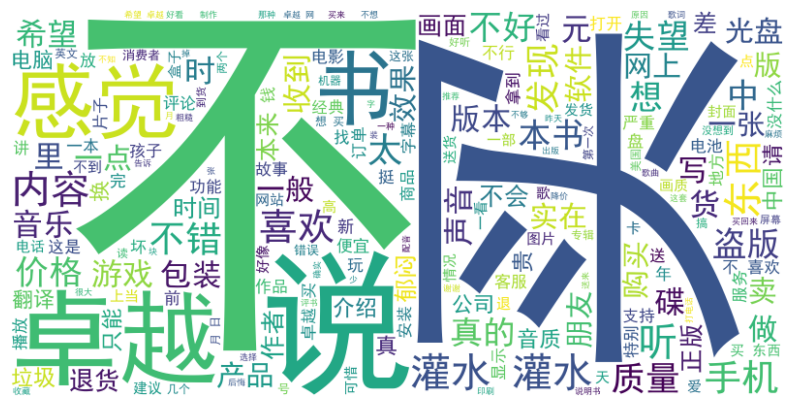

In [13]:
import pandas as pd
import re
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 读取 CSV 文件
file_path = './cn_sample_data/sample.negative.csv'
df = pd.read_csv(file_path)

# 提取 'Content' 列
texts = df['Content']

# 定义一个正则表达式去掉英文单词（保留中文）
def remove_english(text):
    # 只保留中文字符，去除英文和数字
    return re.sub(r'[A-Za-z0-9]+', '', text)

# 去除文本中的英文词汇
cleaned_texts = texts.apply(remove_english)

# 加载停用词
def load_stopwords(stopword_file_path):
    with open(stopword_file_path, 'r', encoding='utf-8') as f:
        stopwords = set(f.read().splitlines())  # 读取并去掉换行符
    return stopwords

# 假设停用词文件为 stopword.txt
stopword_file_path = './stopword.txt'
stopwords = load_stopwords(stopword_file_path)

# 中文分词函数，去除停用词
def chinese_tokenize(text):
    words = jieba.cut(text)  # 使用 jieba 进行分词
    filtered_words = [word for word in words if word not in stopwords and word.strip() != '']  # 去除停用词和空格
    return " ".join(filtered_words)

# 对清理后的文本进行分词
seg_texts = cleaned_texts.apply(chinese_tokenize)

# 将所有文本拼接成一个大的字符串
all_text = " ".join(seg_texts)

# 设置中文字体，防止方框显示
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows平台的黑体字体路径，Mac/Linux 请替换为对应路径

# 生成词云
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white").generate(all_text)

# 显示词云
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # 关闭坐标轴
plt.show()
wordcloud_image_path = "wordcloud_output_negative.png"  # 指定保存的路径和文件名
wordcloud.to_file(wordcloud_image_path)


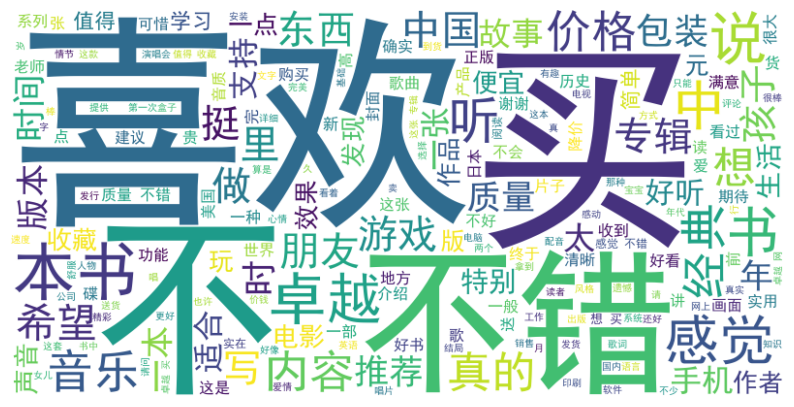

In [12]:
import pandas as pd
import re
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 读取 CSV 文件
file_path = './cn_sample_data/sample.positive.csv'
df = pd.read_csv(file_path)

# 提取 'Content' 列
texts = df['Content']

# 定义一个正则表达式去掉英文单词（保留中文）
def remove_english(text):
    # 只保留中文字符，去除英文和数字
    return re.sub(r'[A-Za-z0-9]+', '', text)

# 去除文本中的英文词汇
cleaned_texts = texts.apply(remove_english)

# 加载停用词
def load_stopwords(stopword_file_path):
    with open(stopword_file_path, 'r', encoding='utf-8') as f:
        stopwords = set(f.read().splitlines())  # 读取并去掉换行符
    return stopwords

# 假设停用词文件为 stopword.txt
stopword_file_path = './stopword.txt'
stopwords = load_stopwords(stopword_file_path)

# 中文分词函数，去除停用词
def chinese_tokenize(text):
    words = jieba.cut(text)  # 使用 jieba 进行分词
    filtered_words = [word for word in words if word not in stopwords and word.strip() != '']  # 去除停用词和空格
    return " ".join(filtered_words)

# 对清理后的文本进行分词
seg_texts = cleaned_texts.apply(chinese_tokenize)

# 将所有文本拼接成一个大的字符串
all_text = " ".join(seg_texts)

# 设置中文字体，防止方框显示
font_path = 'C:/Windows/Fonts/simhei.ttf'  # Windows平台的黑体字体路径，Mac/Linux 请替换为对应路径

# 生成词云
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white").generate(all_text)

# 显示词云
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # 关闭坐标轴
plt.show()
wordcloud_image_path = "wordcloud_output_positive.png"  # 指定保存的路径和文件名
wordcloud.to_file(wordcloud_image_path)
